## 1.0 Libraries

In [7]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

## 2.0 Data Ingestion

In [3]:
df_purchase = pd.read_csv("data\purchase data.csv", index_col=0)

## 3.0 Data Description

In [6]:
df_purchase.isnull().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## 4.0 Import Segmentation Model

In [11]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

## 5.0 Standartization

In [15]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

## 6.0 PCA

In [17]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## 7.0 $k$-means PCA

In [18]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [20]:
df_purchase_predictors = df_purchase.copy()

In [21]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## 8.0 Descriptive Analysis

In [22]:
df_purchase_predictors.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,47,1,110866,1,0,2
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,2
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,2
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,47,1,110866,1,0,2
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,2


In [28]:
temp1 = df_purchase_predictors.reset_index()[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence': 'N Visits'})

In [31]:
temp2 = df_purchase_predictors.reset_index()[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence': 'N Purchases'})

In [32]:
temp3 = temp1.join(temp2)
temp3.head()

,N Visits,N Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [33]:
temp3['Average N Purchases'] = temp3['N Purchases'] / temp3['N Visits']
temp3.head()

,N Visits,N Purchases,Average N Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [34]:
temp4 = df_purchase_predictors.reset_index()[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [35]:
df_purchase_descr

,N Visits,N Purchases,Average N Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0
...,...,...,...,...
200000496,120,20,0.166667,0.0
200000497,120,43,0.358333,2.0
200000498,131,39,0.297710,0.0


## 5.0 Segment Proportions

In [38]:
segm_prop = df_purchase_descr[['N Purchases', 'Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N Purchases': 'Segment Proportions'})
segm_prop.sort_values(by='Segment Proportions', ascending=False).head()

,Segment Proportions
Segment,
2.0,0.378
1.0,0.220
0.0,0.206
3.0,0.196


## 5.1 Purchase Occasion & Incidence

In [40]:
segments_mean = df_purchase_descr.groupby('Segment').mean()
segments_mean

,N Visits,N Purchases,Average N Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [41]:
segments_std = df_purchase_descr.groupby('Segment').std()
segments_std

,N Visits,N Purchases,Average N Purchases
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


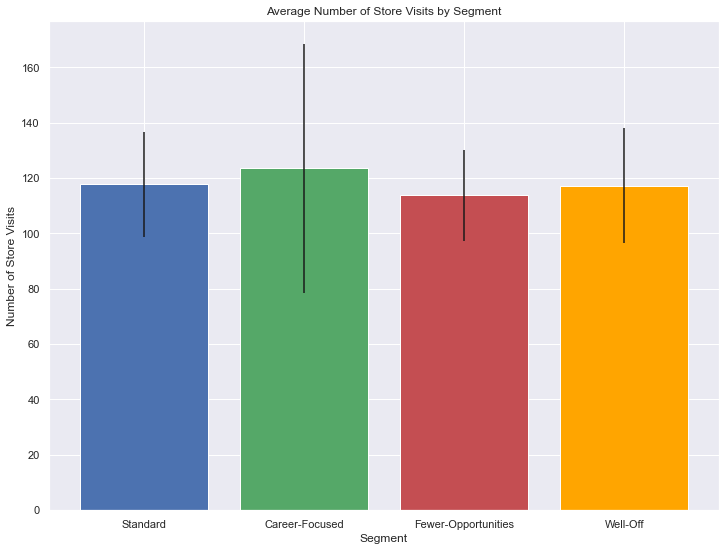

In [43]:
plt.figure(figsize=(12, 9))

col = 'N Visits'

plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean[col],
        yerr = segments_std[col],
        color = ('b', 'g', 'r', 'orange')
        
)

plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

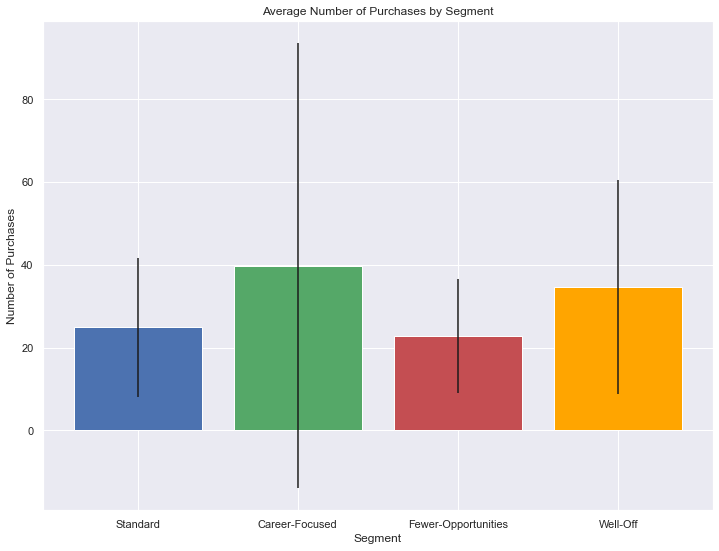

In [44]:
plt.figure(figsize=(12, 9))

col = 'N Purchases'

plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean[col],
        yerr = segments_std[col],
        color = ('b', 'g', 'r', 'orange')
        
)

plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Segment');

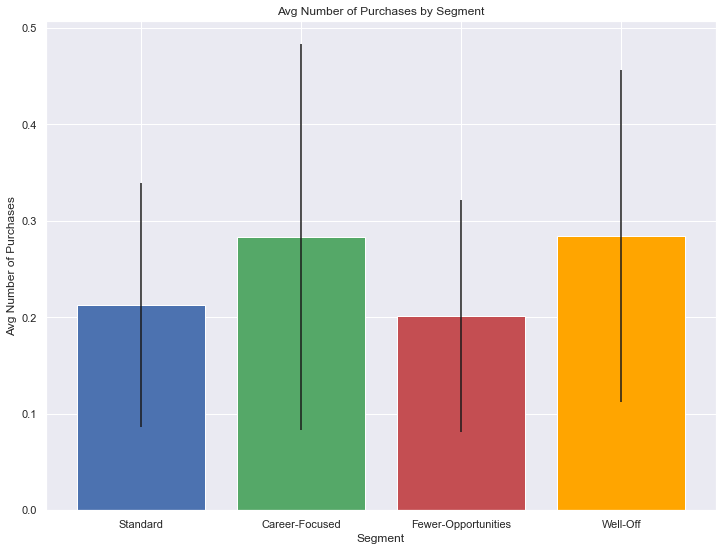

In [46]:
plt.figure(figsize=(12, 9))

col = 'Average N Purchases'

plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean[col],
        yerr = segments_std[col],
        color = ('b', 'g', 'r', 'orange')
        
)

plt.xlabel('Segment')
plt.ylabel('Avg Number of Purchases')
plt.title('Avg Number of Purchases by Segment');

## 5.2 Brand Choice

In [48]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [50]:
df_purchase_incidence['Brand']

ID
200000001    2
200000001    5
200000001    1
200000001    4
200000001    2
            ..
200000500    2
200000500    1
200000500    2
200000500    2
200000500    2
Name: Brand, Length: 14638, dtype: int64

In [61]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence.index
brand_dummies = brand_dummies.reset_index(drop=True)

In [62]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [63]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()

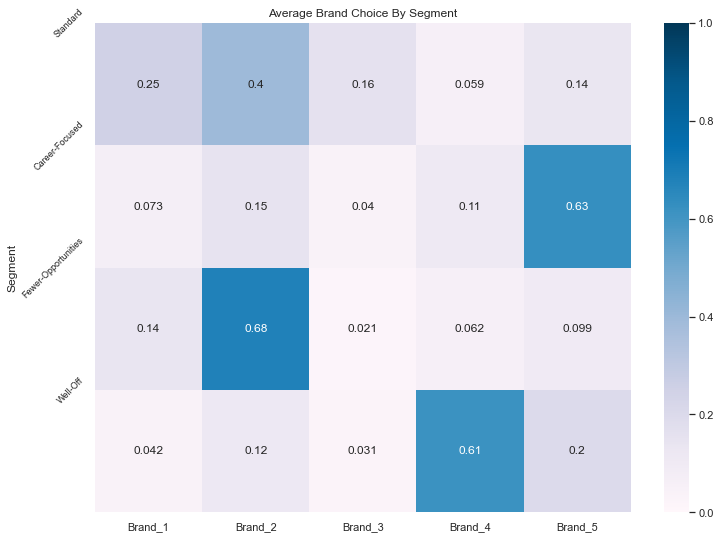

In [65]:
plt.figure(figsize=(12, 9))
sns.heatmap(mean_brand_choice, vmin=0, vmax=1, cmap='PuBu', annot=True)
plt.yticks([0,1,2,3],  ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), rotation=45, fontsize=9)
plt.title('Average Brand Choice By Segment')
plt.show()

## 5.3 Revenue

In [80]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1].copy()
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby('Segment', as_index=False).sum()

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [82]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2].copy()
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby('Segment', as_index=False).sum()

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [83]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3].copy()
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby('Segment', as_index=False).sum()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2611.19,4768.52,3909.17
1,1,736.09,1746.42,664.75
2,2,2258.90,13955.14,716.25
3,3,699.47,1298.23,731.35


In [84]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4].copy()
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby('Segment', as_index=False).sum()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2611.19,4768.52,3909.17,861.38
1,1,736.09,1746.42,664.75,2363.84
2,2,2258.90,13955.14,716.25,1629.31
3,3,699.47,1298.23,731.35,14185.57


In [86]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5].copy()
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby('Segment', as_index=False).sum()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [88]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [89]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0: 'Standard',
                                                                          1: 'Career-Focused',
                                                                          2: 'Fewer-Opportunities',
                                                                          3: 'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
